In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# manually add a2e-mmc repos to PYTHONPATH if needed
import os, sys
module_path = os.path.join(os.environ['HOME'],'a2e-mmc')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import assessment.studies.budget_components_coupling.helpers as helper
from windtools.openfoam import InputFile
import mmctools.plotting as mplt

# update units set to conform to BLM style, e.g., [m s^-1] instead of [m/s]
mplt.standard_fieldlabels = mplt.fieldlabels_superscript_units
mplt.standard_spectrumlabels = mplt.spectrumlabels_superscript_units

In [5]:
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16

# SWIFT budget components coupling study: Plot observations
written by [Dries Allaerts](mailto:dries.allaerts@nrel.gov)

Produce figure showing observations for the paper, "Coupling mesoscale momentum and temperature budget components to a microscale LES solver for wind energy applications", under submission to Boundary-Layer Meteorology. This notebook depends on:
- TTU tower data, generated in `process_TTU_tower.ipynb`

Main directories on Eagle

In [6]:
datadir = '/projects/mmc/dallaert/budget_component_coupling/'
referencedir = '/projects/mmc/dallaert/referenceData/'

Data files

In [7]:
tower_data_10min = 'TTU_tilt_corrected_20131108-09_10min.csv'

In [8]:
starttime = pd.to_datetime('2013-11-08 00:00')

Output folder to store figures

In [9]:
figuredir = 'Figures'

if not os.path.isdir(figuredir):
    os.makedirs(figuredir)

## 1. Load tower data

In [10]:
%%time
tower_10min, _ = helper.load_tower_reference_data(os.path.join(referencedir,tower_data_10min))

# CPU times: user 48.2 ms, sys: 3.9 ms, total: 52.1 ms
# Wall time: 98.4 ms

CPU times: user 40.8 ms, sys: 3 ms, total: 43.8 ms
Wall time: 97.7 ms


## 2. Load WRF driving data

In [11]:
drivingdata = dict()
fpaths = glob.glob(os.path.join(datadir,'drivingData_Rerun','w*','surfaceSkinPotentialTemperatureTable'))
fpaths.sort()
for fpath in fpaths:
    case = os.path.split(os.path.split(fpath)[0])[1]
    inp = InputFile(fpath, nodef=True)
    data = np.array(inp['data'])
    datetime = pd.to_timedelta(data[:,0].round(),unit='s') + starttime
    drivingdata[case] = pd.Series(data[:,1], index=datetime, name='thetav')

## 3. Plot results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


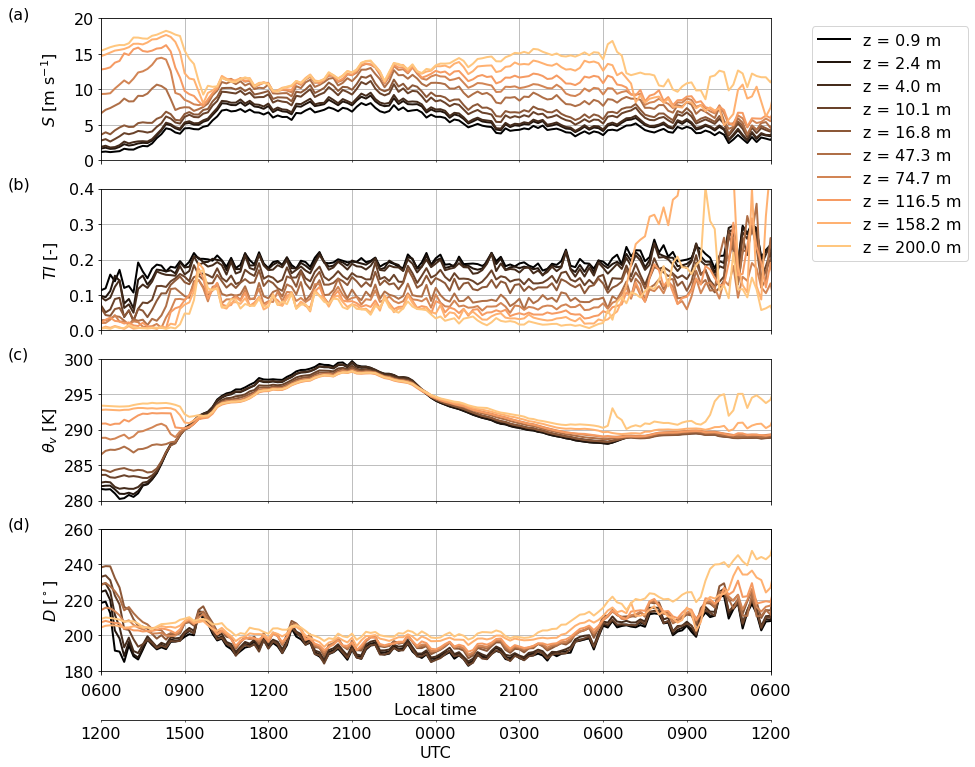

In [14]:
fig,ax,ax2 = mplt.plot_timehistory_at_height(
    datasets = tower_10min,
    fields = ['wspd','TI','thetav','wdir'],
    heights = 'all',
    # Specify field labels
    fieldlabels={'wspd':'$S$ [m s$^{-1}$]','wdir':r'$D$ [$^\circ$]','TI':'$TI$ [-]'},
    # Specify field limits
    fieldlimits={'wspd':(0,20),'wdir':(180,260),'thetav':(280,300),'TI':(0,0.4)},
    # Specify time limits
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    # Add additional axis showing local time
    plot_local_time='%H%M', local_time_offset = -6, cmap='copper',
    # Label subplots
    labelsubplots=True,
    # Additional keyword arguments to personalize plotting style
    linewidth=2,linestyle='-',marker=None,
)

#Move xs tick down slightly to avoid overlap with y ticks in ax[1]
ax[-1].tick_params(axis='x', which='minor', pad=10)
ax[-1].tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax2.xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

# Hide date on local time axis (BLM edits)
ax2.set_xticks([])
ax2.set_xlabel('UTC')

#Save figure
figname = 'Obs_timehistory'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### new plots
added by [Eliot Quon](mailto:eliot.quon@nrel.gov) 2020-02-24

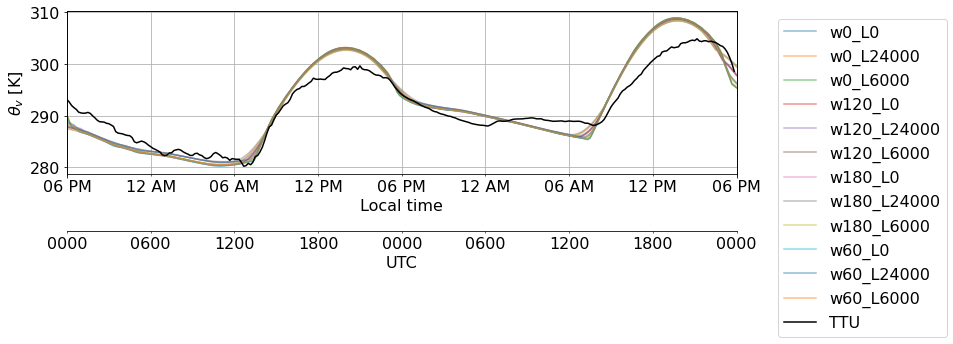

In [13]:
datasets = drivingdata.copy()
datasets['TTU'] = tower_10min['thetav'].xs(0.9,level='height')
fig,ax,ax2 = mplt.plot_timehistory_at_height(datasets,
                                        timelimits=('2013-11-08','2013-11-10'),
                                        plot_local_time=True, local_time_offset=-6,
                                        datasetkwargs={'TTU':dict(color='k',alpha=1.0)},
                                        alpha=0.5)

# Hide date on local time axis (BLM edits)
ax2.set_xticks([])
ax2.set_xlabel('UTC')

figname = 'surf_temp_history'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')